# read Mircle file in to memory

In [1]:
import numpy as np

In [2]:
raw_mx=np.loadtxt(open("connectivity_9k_nosmooth.csv", "rb"), delimiter=",", skiprows=1)

In [4]:
raw_mx.shape

(9030L, 202L)

In [10]:
raw_mx[:,0].shape

(9030L,)

# smoothing over rows in case some of the samples are funky

In [14]:
#TODO smoothing use np.convolve(a,b,same)
smoothed_file_name = 'smoothed_mx.csv'
kernel_width=20
box_kernel = np.ones([kernel_width])/kernel_width
smoothed_mx = np.empty(raw_mx.shape)
for col in range(0,raw_mx.shape[1]):
    smoothed_mx[:,col]=np.convolve(raw_mx[:,col],box_kernel,mode='same')
np.savetxt(smoothed_file_name,smoothed_mx)   #store smoothed matrix to disk

# get the dendrogram from clustering

In [23]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:

# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [25]:
Z = linkage(smoothed_mx, 'ward')

In [26]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [27]:
c, coph_dists = cophenet(Z, pdist(smoothed_mx))
c

0.80161856161139944

In [31]:
Z[:20]

array([[ 1553.,  1554.,     0.,     2.],
       [ 8022.,  8030.,     0.,     2.],
       [ 5271.,  6247.,     0.,     2.],
       [ 5167.,  5171.,     0.,     2.],
       [ 7888.,  7889.,     0.,     2.],
       [ 6989.,  6990.,     0.,     2.],
       [ 4457.,  5827.,     0.,     2.],
       [ 1911.,  5461.,     0.,     2.],
       [   23.,   849.,     0.,     2.],
       [ 2990.,  4435.,     0.,     2.],
       [ 7275.,  9039.,     0.,     3.],
       [ 5761.,  5762.,     0.,     2.],
       [ 6581.,  6583.,     0.,     2.],
       [ 6594.,  6596.,     0.,     2.],
       [ 4331.,  7046.,     0.,     2.],
       [ 7048.,  9044.,     0.,     3.],
       [ 3492.,  4777.,     0.,     2.],
       [ 4072.,  4915.,     0.,     2.],
       [  505.,   506.,     0.,     2.],
       [ 3473.,  3475.,     0.,     2.]])

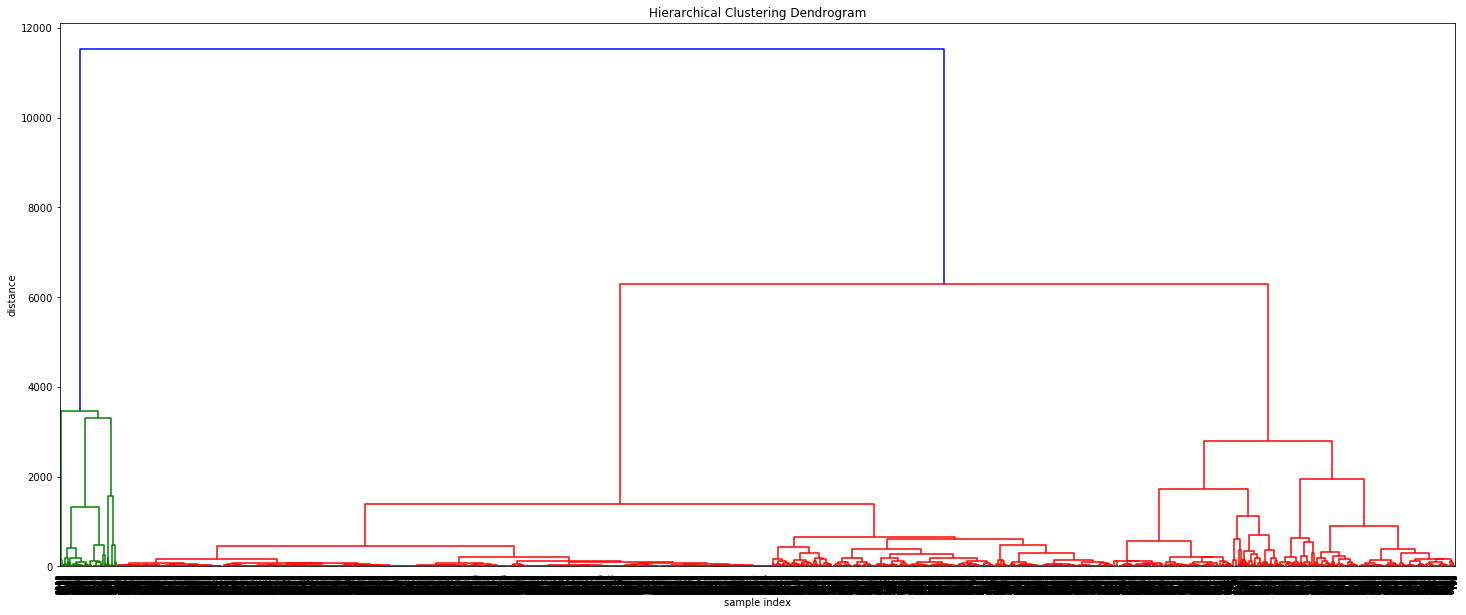

In [32]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

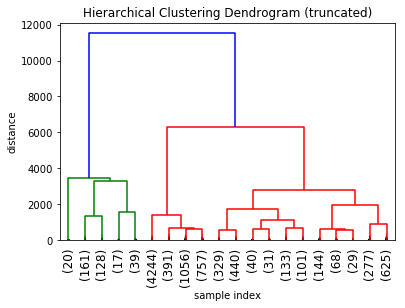

In [37]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    #show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# using elbow method to determing the cluster number (abandoned)

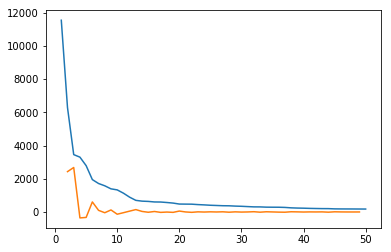

clusters: 3


In [47]:
last = Z[-50:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
#plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  
print "clusters:", k

# using inconsistancy as threshold to retrieve clustering result(flexible)

In [83]:
from scipy.cluster.hierarchy import inconsistent
#investigating the influence of depth on inconsistancy
depth = 50
incons = inconsistent(Z, depth)
print incons[-20:]
print '\n'
depth = 5
incons = inconsistent(Z, depth)
print incons[-20:]

[[   10.54634    48.91443   127.          9.52329]
 [   17.86006    67.21704    96.          7.68911]
 [    6.21554    26.31525   768.         21.39175]
 [    5.78736    25.5877   1812.         23.14735]
 [   20.39655    85.78306    70.          6.78516]
 [   14.72014    61.24054   240.         10.13761]
 [    6.72665    30.37001  2203.         21.22037]
 [   17.58969    63.67004   233.         10.70135]
 [    8.19808    39.8391    901.         22.13803]
 [   21.90078    94.12361   304.         11.79068]
 [   15.57836    89.23928   288.         14.72044]
 [    3.83943    25.99704  6447.         53.37269]
 [   45.81447   220.68782    55.          6.92936]
 [   12.24986    75.82509  1073.         22.42634]
 [   11.2674     73.04173  1142.         26.5164 ]
 [   12.99601    94.91275  2216.         29.23413]
 [   29.95705   213.77252   344.         15.29151]
 [   38.25938   274.66553   364.         12.42863]
 [    6.90602    85.83593  8664.         73.10337]
 [    9.44725   157.69359  9029

In [75]:
from scipy.cluster.hierarchy import fcluster
cluster_tagging=fcluster(Z, 15, depth=16)#increase the inconsitancy threshold to shrink the cluster size

cluster_tagging.max()


27

In [80]:
tagging_dict ={}
for key in range(1,cluster_tagging.max()+1):
    tagging_dict[key] = np.where(cluster_tagging==key)

In [81]:
tagging_dict

{1: (array([8303, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313,
         8314, 8315, 8316, 8317, 8318, 8319, 8320, 8321, 8322], dtype=int64),),
 2: (array([ 338,  339,  340,  341,  342,  343,  344,  345,  346,  347,  348,
          349,  350,  351,  352,  353,  354,  355,  356,  357,  403,  404,
          405,  406,  407,  408,  409,  410,  411,  412,  413,  414,  415,
          416,  417,  418,  419,  420,  421,  422, 1471, 1472, 1473, 1474,
         1491, 1492, 1493, 1494, 2328, 2329, 2330, 2331, 2332, 2333, 2334,
         2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345,
         2346, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725,
         2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 4091,
         4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102,
         4103, 4104, 4105, 4106, 4631, 4632, 4633, 4634, 4635, 4636, 4637,
         4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648,
         4649,